# Model `Hyper` and `HyperPlus`

An example of prediction task using `Hyper` and `HyperPlus` with `RatioSplit`.

In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 30
[I] n            : 50
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


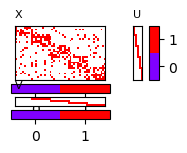

<Figure size 640x480 with 0 Axes>

In [7]:
# from generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=10, n=10, k=5, overlap=[0.1, 0.1])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix()

from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=30, n=50, k=5, overlap=[0.1, 0.1])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix()

In [8]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [9]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718158923
[I]   train_size   : 337
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718158923


# `Hyper` for exact decomposition

Since `Hyper` is an exact decomposition algorithm, there will be absolutely no coverage on validation and test set.

[I] min_support  : 0.2
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Found 11 itemsets, max size: 2


[I] Finding exact decomposition:  92%|█████████▏| 56/61 [00:00<00:00, 72.39it/s]


train                      \
                                                    0                       
                 time   k iter        shape    Recall Precision  Accuracy   
0   12/06/24 10:22:04   0    0   [9.0, 2.0]  0.053412       1.0  0.787333   
1   12/06/24 10:22:04   1    0   [7.0, 2.0]  0.094955       1.0  0.796667   
2   12/06/24 10:22:04   2    1   [6.0, 2.0]  0.130564       1.0  0.804667   
3   12/06/24 10:22:04   3    0   [6.0, 2.0]  0.166172       1.0  0.812667   
4   12/06/24 10:22:04   4    5   [6.0, 2.0]  0.192878       1.0  0.818667   
5   12/06/24 10:22:04   5    0   [6.0, 2.0]  0.216617       1.0  0.824000   
6   12/06/24 10:22:04   6    0   [6.0, 2.0]  0.240356       1.0  0.829333   
7   12/06/24 10:22:04   7    4  [11.0, 1.0]  0.272997       1.0  0.836667   
8   12/06/24 10:22:04   8    0  [10.0, 1.0]  0.302671       1.0  0.843333   
9   12/06/24 10:22:04   9    3  [10.0, 1.0]  0.332344       1.0  0.850000   
10  12/06/24 10:22:04  10    0   [9.0, 1.0]  0.359050       1.0  0.856000   
11  12/06/24 10:22:04  11    1   [9.0, 1.0]  0.385757       1.0  0.862000   
12  12/06/24 10:22:04  12    0   [9.0, 1.0]  0.412463       1.0  0.868000   
13  12/06/24 10:22:04  13    3   [8.0, 1.0]  0.436202       1.0  0.873333   
14  12/06/24 10:22:04  14    1   [8.0, 1.0]  0.459941       1.0  0.878667   
15  12/06/24 10:22:04  15    0   [8.0, 1.0]  0.483680       1.0  0.884000   
16  12/06/24 10:22:04  16    0   [8.0, 1.0]  0.507418       1.0  0.889333   
17  12/06/24 10:22:04  17    0   [7.0, 1.0]  0.528190       1.0  0.894000   
18  12/06/24 10:22:04  18    0   [7.0, 1.0]  0.548961       1.0  0.898667   
19  12/06/24 10:22:04  19    0   [7.0, 1.0]  0.569733       1.0  0.903333   
20  12/06/24 10:22:04  20    1   [7.0, 1.0]  0.590504       1.0  0.908000   
21  12/06/24 10:22:04  21    0   [6.0, 1.0]  0.608309       1.0  0.912000   
22  12/06/24 10:22:04  22    0   [6.0, 1.0]  0.626113       1.0  0.916000   
23  12/06/24 10:22:04  23    0   [6.0, 1.0]  0.643917       1.0  0.920000   
24  12/06/24 10:22:04  24    0   [6.0, 1.0]  0.661721       1.0  0.924000   
25  12/06/24 10:22:04  25    0   [6.0, 1.0]  0.679525       1.0  0.928000   
26  12/06/24 10:22:04  26    0   [6.0, 1.0]  0.697329       1.0  0.932000   
27  12/06/24 10:22:04  27    0   [6.0, 1.0]  0.715134       1.0  0.936000   
28  12/06/24 10:22:04  28    0   [6.0, 1.0]  0.732938       1.0  0.940000   
29  12/06/24 10:22:04  29    0   [5.0, 1.0]  0.747774       1.0  0.943333   
30  12/06/24 10:22:04  30    0   [5.0, 1.0]  0.762611       1.0  0.946667   
31  12/06/24 10:22:04  31    0   [5.0, 1.0]  0.777448       1.0  0.950000   
32  12/06/24 10:22:04  32    0   [5.0, 1.0]  0.792285       1.0  0.953333   
33  12/06/24 10:22:04  33    0   [5.0, 1.0]  0.807122       1.0  0.956667   
34  12/06/24 10:22:04  34    0   [4.0, 1.0]  0.818991       1.0  0.959333   
35  12/06/24 10:22:04  35    0   [4.0, 1.0]  0.830861       1.0  0.962000   
36  12/06/24 10:22:04  36    0   [4.0, 1.0]  0.842730       1.0  0.964667   
37  12/06/24 10:22:04  37    1   [4.0, 1.0]  0.854599       1.0  0.967333   
38  12/06/24 10:22:04  38    0   [4.0, 1.0]  0.866469       1.0  0.970000   
39  12/06/24 10:22:04  39    0   [4.0, 1.0]  0.878338       1.0  0.972667   
40  12/06/24 10:22:04  40    0   [4.0, 1.0]  0.890208       1.0  0.975333   
41  12/06/24 10:22:04  41    0   [3.0, 1.0]  0.899110       1.0  0.977333   
42  12/06/24 10:22:04  42    0   [3.0, 1.0]  0.908012       1.0  0.979333   
43  12/06/24 10:22:04  43    0   [3.0, 1.0]  0.916914       1.0  0.981333   
44  12/06/24 10:22:04  44    0   [3.0, 1.0]  0.925816       1.0  0.983333   
45  12/06/24 10:22:04  45    0   [3.0, 1.0]  0.934718       1.0  0.985333   
46  12/06/24 10:22:04  46    0   [3.0, 1.0]  0.943620       1.0  0.987333   
47  12/06/24 10:22:04  47    0   [3.0, 1.0]  0.952522       1.0  0.989333   
48  12/06/24 10:22:04  48    0   [3.0, 1.0]  0.961424       1.0  0.991333   
49  12/06/24 10:22:04  49    0   [3.0, 1.0] 

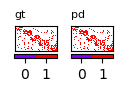

[I] model saved as: 24-06-12_10-22-05_Hyper.pickle


<Figure size 640x480 with 0 Axes>

In [10]:
from models import Hyper
import warnings

min_support = 0.2

model = Hyper(min_support=min_support)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False)

In [11]:
# import pickle

# with open('hyper_model.pickle', 'wb') as handle:
#     pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('hyper_model.pickle', 'rb') as handle:
#     model = pickle.load(handle)

# `HyperPlus` for approximate decomposition

[I] model        : <models.Hyper.Hyper object at 0x000001E7404E0A90>
[I] beta         : inf
[I] target_k     : 1
[I] samples      : 500
[I] verbose      : False
[I] display      : False
[I] k from model : 57
[I] task         : reconstruction
[I] display      : True


[I] Sampling pairs... Current FP budget: 0.042: 100%|██████████| 55/55 [00:00<00:00, 27446.37it/s]
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
[I] Sampling pairs... Current FP budget: 0.045: 100%|██████████| 54/54 [00:00<00:00, 26931.32it/s]
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
[I] Sampling pairs... Current FP budget: 0.074: 100%|██████████| 53/53 [00:00<00:00, 52465.92it/s]
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
[I] 

train                      \
                                                    0                       
                 time   k iter        shape    Recall Precision  Accuracy   
0   12/06/24 10:22:04   0    0   [9.0, 2.0]  0.053412       1.0  0.787333   
1   12/06/24 10:22:04   1    0   [7.0, 2.0]  0.094955       1.0  0.796667   
2   12/06/24 10:22:04   2    1   [6.0, 2.0]  0.130564       1.0  0.804667   
3   12/06/24 10:22:04   3    0   [6.0, 2.0]  0.166172       1.0  0.812667   
4   12/06/24 10:22:04   4    5   [6.0, 2.0]  0.192878       1.0  0.818667   
5   12/06/24 10:22:04   5    0   [6.0, 2.0]  0.216617       1.0  0.824000   
6   12/06/24 10:22:04   6    0   [6.0, 2.0]  0.240356       1.0  0.829333   
7   12/06/24 10:22:04   7    4  [11.0, 1.0]  0.272997       1.0  0.836667   
8   12/06/24 10:22:04   8    0  [10.0, 1.0]  0.302671       1.0  0.843333   
9   12/06/24 10:22:04   9    3  [10.0, 1.0]  0.332344       1.0  0.850000   
10  12/06/24 10:22:04  10    0   [9.0, 1.0]  0.359050       1.0  0.856000   
11  12/06/24 10:22:04  11    1   [9.0, 1.0]  0.385757       1.0  0.862000   
12  12/06/24 10:22:04  12    0   [9.0, 1.0]  0.412463       1.0  0.868000   
13  12/06/24 10:22:04  13    3   [8.0, 1.0]  0.436202       1.0  0.873333   
14  12/06/24 10:22:04  14    1   [8.0, 1.0]  0.459941       1.0  0.878667   
15  12/06/24 10:22:04  15    0   [8.0, 1.0]  0.483680       1.0  0.884000   
16  12/06/24 10:22:04  16    0   [8.0, 1.0]  0.507418       1.0  0.889333   
17  12/06/24 10:22:04  17    0   [7.0, 1.0]  0.528190       1.0  0.894000   
18  12/06/24 10:22:04  18    0   [7.0, 1.0]  0.548961       1.0  0.898667   
19  12/06/24 10:22:04  19    0   [7.0, 1.0]  0.569733       1.0  0.903333   
20  12/06/24 10:22:04  20    1   [7.0, 1.0]  0.590504       1.0  0.908000   
21  12/06/24 10:22:04  21    0   [6.0, 1.0]  0.608309       1.0  0.912000   
22  12/06/24 10:22:04  22    0   [6.0, 1.0]  0.626113       1.0  0.916000   
23  12/06/24 10:22:04  23    0   [6.0, 1.0]  0.643917       1.0  0.920000   
24  12/06/24 10:22:04  24    0   [6.0, 1.0]  0.661721       1.0  0.924000   
25  12/06/24 10:22:04  25    0   [6.0, 1.0]  0.679525       1.0  0.928000   
26  12/06/24 10:22:04  26    0   [6.0, 1.0]  0.697329       1.0  0.932000   
27  12/06/24 10:22:04  27    0   [6.0, 1.0]  0.715134       1.0  0.936000   
28  12/06/24 10:22:04  28    0   [6.0, 1.0]  0.732938       1.0  0.940000   
29  12/06/24 10:22:04  29    0   [5.0, 1.0]  0.747774       1.0  0.943333   
30  12/06/24 10:22:04  30    0   [5.0, 1.0]  0.762611       1.0  0.946667   
31  12/06/24 10:22:04  31    0   [5.0, 1.0]  0.777448       1.0  0.950000   
32  12/06/24 10:22:04  32    0   [5.0, 1.0]  0.792285       1.0  0.953333   
33  12/06/24 10:22:04  33    0   [5.0, 1.0]  0.807122       1.0  0.956667   
34  12/06/24 10:22:04  34    0   [4.0, 1.0]  0.818991       1.0  0.959333   
35  12/06/24 10:22:04  35    0   [4.0, 1.0]  0.830861       1.0  0.962000   
36  12/06/24 10:22:04  36    0   [4.0, 1.0]  0.842730       1.0  0.964667   
37  12/06/24 10:22:04  37    1   [4.0, 1.0]  0.854599       1.0  0.967333   
38  12/06/24 10:22:04  38    0   [4.0, 1.0]  0.866469       1.0  0.970000   
39  12/06/24 10:22:04  39    0   [4.0, 1.0]  0.878338       1.0  0.972667   
40  12/06/24 10:22:04  40    0   [4.0, 1.0]  0.890208       1.0  0.975333   
41  12/06/24 10:22:04  41    0   [3.0, 1.0]  0.899110       1.0  0.977333   
42  12/06/24 10:22:04  42    0   [3.0, 1.0]  0.908012       1.0  0.979333   
43  12/06/24 10:22:04  43    0   [3.0, 1.0]  0.916914       1.0  0.981333   
44  12/06/24 10:22:04  44    0   [3.0, 1.0]  0.925816       1.0  0.983333   
45  12/06/24 10:22:04  45    0   [3.0, 1.0]  0.934718       1.0  0.985333   
46  12/06/24 10:22:04  46    0   [3.0, 1.0]  0.943620       1.0  0.987333   
47  12/06/24 10:22:04  47    0   [3.0, 1.0]  0.952522       1.0  0.989333   
48  12/06/24 10:22:04  48    0   [3.0, 1.0]  0.961424       1.0  0.991333   
49  12/06/24 10:22:04  49    0   [3.0, 1.0] 

train  \
                                                                     0   
                 time   k savings       FPR       FPB       OCR Recall   
0   12/06/24 11:05:39  56     inf  0.012038  0.041543  0.039886    1.0   
1   12/06/24 11:05:41  55     inf  0.012898  0.044510  0.042614    1.0   
2   12/06/24 11:05:43  54     inf  0.021496  0.074184  0.069061    1.0   
3   12/06/24 11:05:44  53     inf  0.031814  0.109792  0.098930    1.0   
4   12/06/24 11:05:46  52     inf  0.038693  0.133531  0.117801    1.0   
5   12/06/24 11:05:48  51     inf  0.042992  0.148368  0.129199    1.0   
6   12/06/24 11:05:50  50     inf  0.067928  0.234421  0.189904    1.0   
7   12/06/24 11:05:51  49     inf  0.084265  0.290801  0.225287    1.0   
8   12/06/24 11:05:53  48     inf  0.094583  0.326409  0.246085    1.0   
9   12/06/24 11:05:55  47     inf  0.104901  0.362018  0.265795    1.0   
10  12/06/24 11:05:57  46     inf  0.116079  0.400593  0.286017    1.0   
11  12/06/24 11:05:58  45     inf  0.122098  0.421365  0.296451    1.0   
12  12/06/24 11:06:00  44     inf  0.132416  0.456973  0.313646    1.0   
13  12/06/24 11:06:02  43     inf  0.139295  0.480712  0.324649    1.0   
14  12/06/24 11:06:04  42     inf  0.147893  0.510386  0.337917    1.0   
15  12/06/24 11:06:05  41     inf  0.159071  0.548961  0.354406    1.0   
16  12/06/24 11:06:07  40     inf  0.179708  0.620178  0.382784    1.0   
17  12/06/24 11:06:09  39     inf  0.195185  0.673591  0.402482    1.0   
18  12/06/24 11:06:10  38     inf  0.216681  0.747774  0.427844    1.0   
19  12/06/24 11:06:12  37     inf  0.227859  0.786350  0.440199    1.0   
20  12/06/24 11:06:14  36     inf  0.233878  0.807122  0.446634    1.0   
21  12/06/24 11:06:16  35     inf  0.251935  0.869436  0.465079    1.0   
22  12/06/24 11:06:18  34     inf  0.262253  0.905045  0.475078    1.0   
23  12/06/24 11:06:19  33     inf  0.267412  0.922849  0.479938    1.0   
24  12/06/24 11:06:21  32     inf  0.274291  0.946588  0.486280    1.0   
25  12/06/24 11:06:23  31     inf  0.288048  0.994065  0.498512    1.0   
26  12/06/24 11:06:25  30     inf  0.288908  0.997033  0.499257    1.0   
27  12/06/24 11:06:26  29     inf  0.300086  1.035608  0.508746    1.0   
28  12/06/24 11:06:28  28     inf  0.303525  1.047478  0.511594    1.0   
29  12/06/24 11:06:29  27     inf  0.321582  1.109792  0.526020    1.0   
30  12/06/24 11:06:30  26     inf  0.325021  1.121662  0.528671    1.0   
31  12/06/24 11:06:32  25     inf  0.338779  1.169139  0.538988    1.0   
32  12/06/24 11:06:33  24     inf  0.344798  1.189911  0.543360    1.0   
33  12/06/24 11:06:34  23     inf  0.349097  1.204748  0.546433    1.0   
34  12/06/24 11:06:34  22     inf  0.367154  1.267062  0.558901    1.0   
35  12/06/24 11:06:35  21     inf  0.373173  1.287834  0.562905    1.0   
36  12/06/24 11:06:36  20     inf  0.430782  1.486647  0.597852    1.0   
37  12/06/24 11:06:37  19     inf  0.468616  1.617211  0.617914    1.0   
38  12/06/24 11:06:37  18     inf  0.500430  1.727003  0.633297    1.0   
39  12/06/24 11:06:38  17     inf  0.518487  1.789318  0.641489    1.0   
40  12/06/24 11:06:38  16     inf  0.546002  1.884273  0.653292    1.0   
41  12/06/24 11:06:39  15     inf  0.592433  2.044510  0.671540    1.0   
42  12/06/24 11:06:39  14     inf  0.605331  2.089021  0.676273    1.0   
43  12/06/24 11:06:39  13     inf  0.637145  2.198813  0.687384    1.0   
44  12/06/24 11:06:40  12     inf  0.676698  2.335312  0.700178    1.0   
45  12/06/24 11:06:40  11     inf  0.703353  2.427300  0.708225    1.0   
46  12/06/24 11:06:40  10     inf  0.710232  2.451039  0.710232    1.0   
47  12/06/24 11:06:40   9     inf  0.719690  2.483680  0.712947    1.0   
48  12/06/24 11:06:40   8     inf  0.747206  2.578635  0.720564    1.0   
49  12/06/24 11:06:41   7     inf  0.824592  2.845697  0.739969    1.0   
50  12/06/24 11:06:41   6     inf  0.835770  2.884273  0.742552    1.0   
51  12/06/24 11:06:41   5     inf  0.872743  3.011869  0.750740    1.

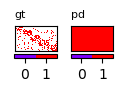

PicklingError: Can't pickle <class 'models.Hyper.Hyper'>: it's not the same object as models.Hyper.Hyper

<Figure size 640x480 with 0 Axes>

In [16]:
from models import HyperPlus
import warnings

import numpy as np
beta = np.inf
samples = 500
target_k = 1

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model_plus = HyperPlus(model=model, beta=beta, samples=samples, target_k=target_k)
model_plus.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=True)

In [13]:
model_plus.logs['refinements']

NameError: name 'model_plus' is not defined

In [ ]:
# model_plus.logs['results'].to_pickle("./model_plus_results.pickle")
# model_plus.logs['refinements'].to_pickle("./model_plus_refinements.pickle")  

In [ ]:
model_plus.logs['U']

[<30x56 sparse matrix of type '<class 'numpy.float64'>'
 	with 300 stored elements in List of Lists format>,
 <30x55 sparse matrix of type '<class 'numpy.float64'>'
 	with 297 stored elements in List of Lists format>,
 <30x54 sparse matrix of type '<class 'numpy.float64'>'
 	with 297 stored elements in List of Lists format>,
 <30x53 sparse matrix of type '<class 'numpy.float64'>'
 	with 296 stored elements in List of Lists format>,
 <30x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 291 stored elements in List of Lists format>,
 <30x51 sparse matrix of type '<class 'numpy.float64'>'
 	with 287 stored elements in List of Lists format>,
 <30x50 sparse matrix of type '<class 'numpy.float64'>'
 	with 284 stored elements in List of Lists format>,
 <30x49 sparse matrix of type '<class 'numpy.float64'>'
 	with 281 stored elements in List of Lists format>,
 <30x48 sparse matrix of type '<class 'numpy.float64'>'
 	with 277 stored elements in List of Lists format>,
 <30x47 sparse matr